<a href="https://colab.research.google.com/github/ManishSuhas0026/Reinforcement-Learning/blob/main/530_RL_Lab_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [ ]:
class EpsilonGreedyBandit:
    def __init__(self, num_arms, epsilon):
        self.num_arms = num_arms  # Number of ad slots (arms)
        self.epsilon = epsilon  # Exploration probability
        self.counts = np.zeros(num_arms)  # Number of times each slot has been selected
        self.values = np.zeros(num_arms)  # Estimated CTR for each slot (average reward)

    def select_arm(self):
        # Exploration: choose a random arm
        if random.random() < self.epsilon:
            return random.randint(0, self.num_arms - 1)
        # Exploitation: choose the arm with the highest estimated CTR
        else:
            return np.argmax(self.values)

    def update(self, chosen_arm, reward):
        # Increment the count for the chosen arm
        self.counts[chosen_arm] += 1
        # Update the estimated CTR (average reward) using the new reward
        n = self.counts[chosen_arm]
        value = self.values[chosen_arm]
        # Incremental average formula to update CTR
        new_value = ((n - 1) / n) * value + (1 / n) * reward
        self.values[chosen_arm] = new_value

In [ ]:
# Simulate the multi-armed bandit problem
def simulate_bandit(num_impressions, epsilon, true_ctr):
    num_arms = len(true_ctr)  # Number of ad slots
    bandit = EpsilonGreedyBandit(num_arms, epsilon)
    total_reward = 0
    rewards = []

    for i in range(num_impressions):
        # Select an ad slot using the epsilon-greedy algorithm
        chosen_arm = bandit.select_arm()

        # Simulate a user response (click or no click) based on the true CTR for that slot
        reward = 1 if random.random() < true_ctr[chosen_arm] else 0

        # Update the bandit with the observed reward
        bandit.update(chosen_arm, reward)

        # Accumulate total rewards (clicks)
        total_reward += reward
        rewards.append(total_reward)

    # Print final estimated CTR for each ad slot
    print(f"Estimated CTRs: {bandit.values}")
    return rewards

In [ ]:
num_impressions = 1000
epsilon = 0.1
true_ctr = [0.15, 0.05, 0.07, 0.10]  # Assumed true probabilities of click-through

# Run the simulation
rewards = simulate_bandit(num_impressions, epsilon, true_ctr)

Estimated CTRs: [0.13979707 0.04545455 0.09302326 0.125     ]


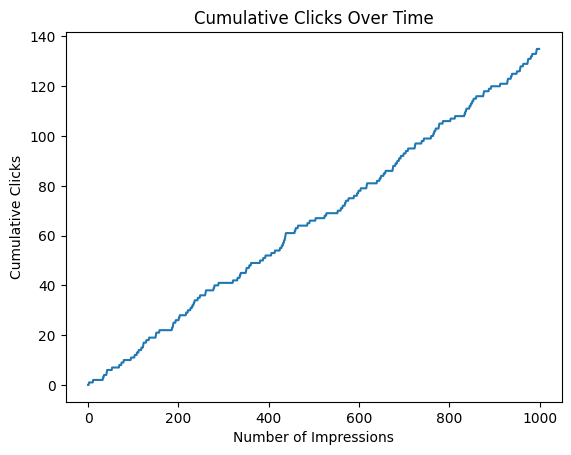

In [ ]:
plt.plot(rewards)
plt.title("Cumulative Clicks Over Time")
plt.xlabel("Number of Impressions")
plt.ylabel("Cumulative Clicks")
plt.show()